In [139]:
#导入包

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [140]:
#读数据
data = pd.read_csv('ex1/ex1data1.txt',names=['population','profit'])
data.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [141]:
#查看数据属性
data.describe()

,population,profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


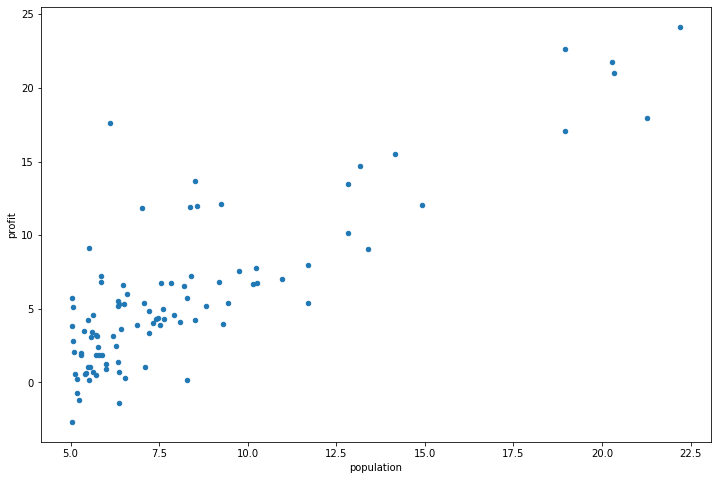

In [142]:
#图形表示数据
data.plot(kind='scatter',x='population',y='profit',figsize=(12,8))
plt.show()

In [143]:
#代价函数
def cost_compute(X,y,theta):
    inner = np.power(((X * theta.T) -y),2)
    
    return  np.sum(inner) / (2*len(X))

In [144]:
data.insert(0,'ones',1)
data.head()

,ones,population,profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [145]:
#设置训练集

X= data.loc[:,['ones','population']]
y= data.loc[:,['profit']]

In [146]:
X.head()

,ones,population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [147]:
y.head()

,profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


In [148]:
X = np.matrix(X.values)
y = np.matrix(y.values)

#X = np.array(X.values)
#y = np.array(y.values)

In [155]:
theta = np.matrix(np.array([0,0]))
(X * (theta.T))[:5,:]

matrix([[0.],
        [0.],
        [0.],
        [0.],
        [0.]])

In [150]:
X.shape,theta.shape,y.shape

((97, 2), (1, 2), (97, 1))

In [151]:
cost_compute(X,y,theta)

32.072733877455676

# batch gradient decent（批量梯度下降）
$${{\theta }_{j}}:={{\theta }_{j}}-\alpha \frac{\partial }{\partial {{\theta }_{j}}}J\left( \theta  \right)$$

求导后得：

$${{\theta }_{j}}:={{\theta }_{j}}-\alpha\frac{1}{m}\sum\limits_{i=1}^{m}{{{\left(\left( {{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}} \right)x_j^{(i)}\right)}}}$$

In [151]:
# batch gradient decent（批量梯度下降）

def gradientDescent(X,y,theta,alpha,iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1]) 
     
    for i in range(iters):
        error = X * theta.T - y
        
        for j in range(parameters):
            term = np.multiply(error,X[:,j])
        
        
    return theta
